# Manufacturing Model

This notebook explores how different manufacturing conditions affect the quality of the final product. For more information on the dataset, please refer to the [dataset page](https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_manufacturing = pd.read_csv("datasets/manufacturing.csv")

In [4]:
df_manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [5]:
# Rename columns
df_manufacturing.columns = [
    "temperature",
    "pressure",
    "temperature_times_pressure",
    "material_fusion_metric",
    "material_transformation_metric",
    "quality_rating",
]

In [6]:
# Create a copy of the dataframe for EDA
df_manufacturing_eda = df_manufacturing.copy()

## Exploratory Data Analysis


In [7]:
df_manufacturing_eda.head(10)

,temperature,pressure,temperature_times_pressure,material_fusion_metric,material_transformation_metric,quality_rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


In [8]:
# Check for missing values
df_manufacturing_eda.isnull().sum()

temperature                       0
pressure                          0
temperature_times_pressure        0
material_fusion_metric            0
material_transformation_metric    0
quality_rating                    0
dtype: int64

In [9]:
df_manufacturing_eda.describe()

,temperature,pressure,temperature_times_pressure,material_fusion_metric,material_transformation_metric,quality_rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


The **quality rating** column, which is the target, has a minimum value of 1 and a maximum value of 100. What concerns me is that the 25th percentile is over 99, which means that the data is strongly skewed to the right. This is confirmed by the histogram below.


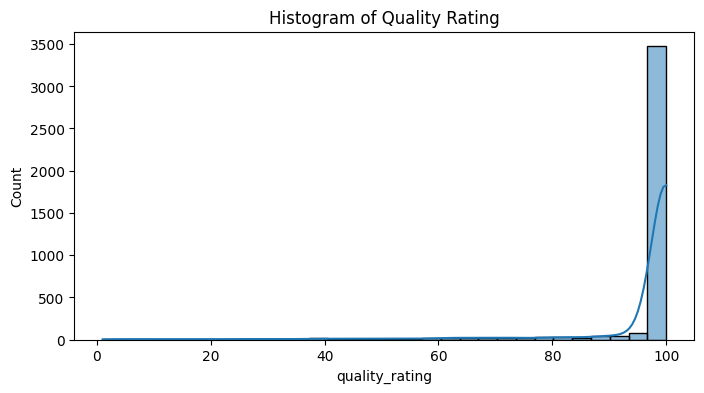

In [10]:
# Histogram of quality rating
plt.figure(figsize=(8, 4))
sns.histplot(df_manufacturing_eda["quality_rating"], bins=30, kde=True)
plt.title("Histogram of Quality Rating")
plt.show()

In [11]:
# Count records with quality_rating below 99
records_below_99 = df_manufacturing_eda[
    df_manufacturing_eda["quality_rating"] < 99
].shape[0]
total_records = df_manufacturing_eda.shape[0]

print(
    f"Records with quality_rating below 99: {records_below_99} ({records_below_99/total_records:.2%})"
)

Records with quality_rating below 99: 636 (16.07%)


Text(0.5, 1.0, 'Boxplot of Temperature')

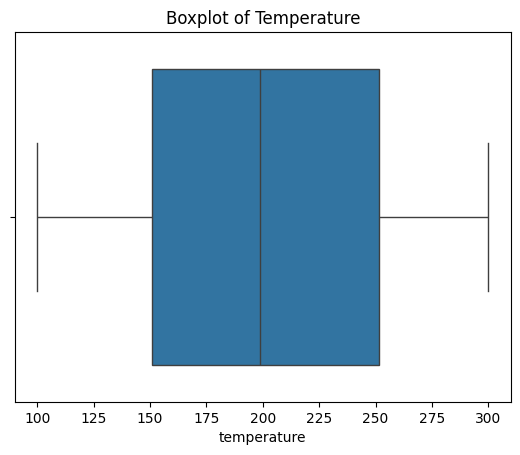

In [12]:
sns.boxplot(x=df_manufacturing_eda["temperature"])
plt.title("Boxplot of Temperature")

Text(0.5, 1.0, 'Boxplot of Pressure')

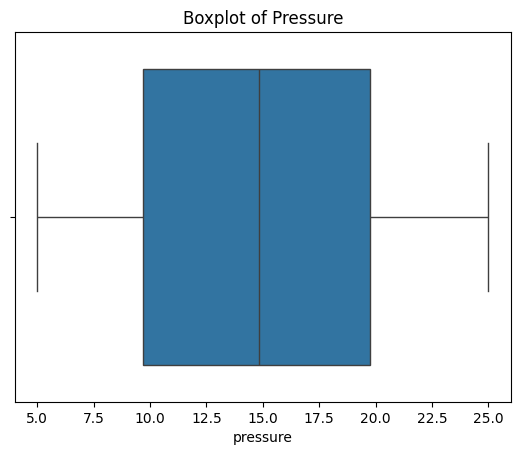

In [13]:
sns.boxplot(x=df_manufacturing_eda["pressure"])
plt.title("Boxplot of Pressure")

Text(0.5, 1.0, 'Boxplot of Temperature Times Pressure')

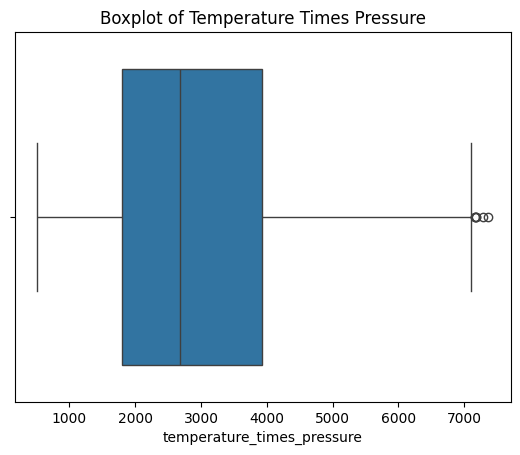

In [14]:
sns.boxplot(x=df_manufacturing_eda["temperature_times_pressure"])
plt.title("Boxplot of Temperature Times Pressure")

Text(0.5, 1.0, 'Boxplot of Material Fusion Metric')

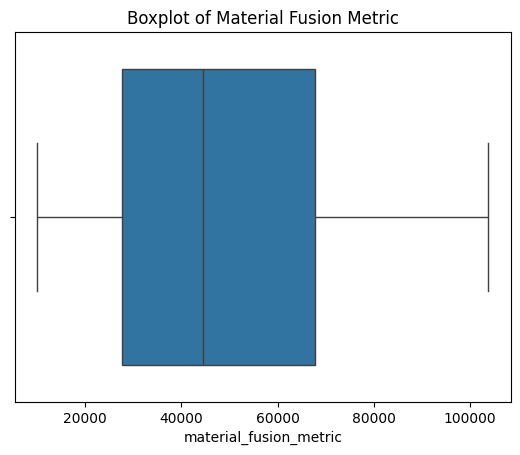

In [15]:
sns.boxplot(x=df_manufacturing_eda["material_fusion_metric"])
plt.title("Boxplot of Material Fusion Metric")

Text(0.5, 1.0, 'Boxplot of Material Transformation Metric')

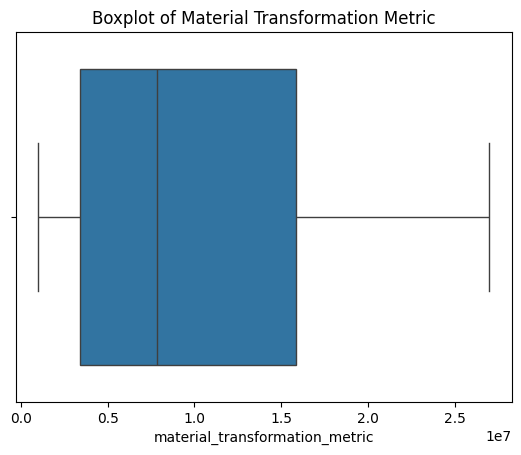

In [16]:
sns.boxplot(x=df_manufacturing_eda["material_transformation_metric"])
plt.title("Boxplot of Material Transformation Metric")

Text(0.5, 1.0, 'Boxplot of Quality Rating')

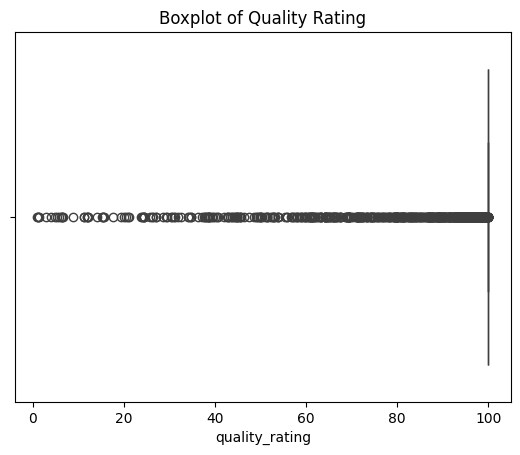

In [17]:
sns.boxplot(x=df_manufacturing_eda["quality_rating"])
plt.title("Boxplot of Quality Rating")

Text(0.5, 1.0, 'Scatterplot of Temperature vs Quality Rating')

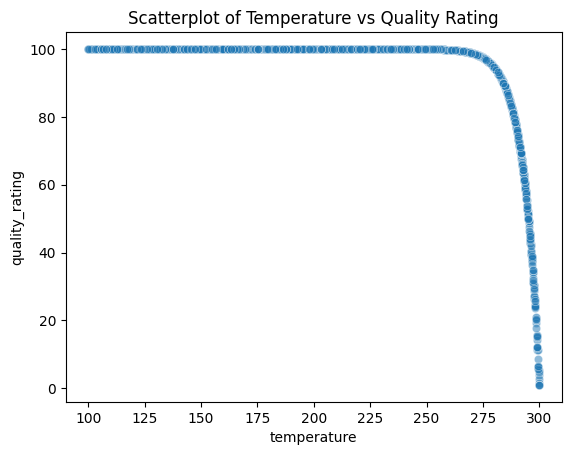

In [18]:
sns.scatterplot(
    x="temperature",
    y="quality_rating",
    data=df_manufacturing_eda,
    alpha=0.5,
)
plt.title("Scatterplot of Temperature vs Quality Rating")

Text(0.5, 1.0, 'Scatterplot of Pressure vs Quality Rating')

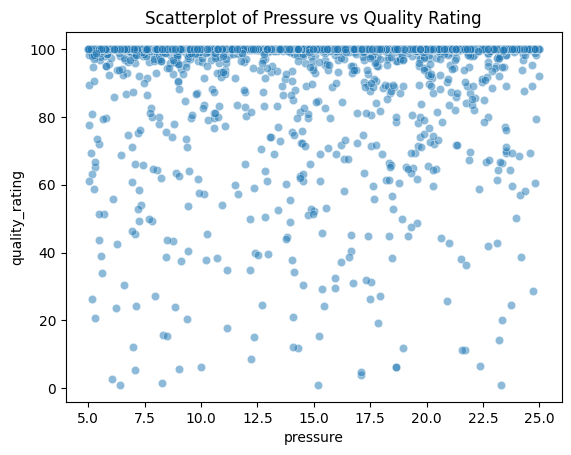

In [19]:
sns.scatterplot(
    x="pressure",
    y="quality_rating",
    data=df_manufacturing_eda,
    alpha=0.5,
)
plt.title("Scatterplot of Pressure vs Quality Rating")

Text(0.5, 1.0, 'Scatterplot of Temperature Times Pressure vs Quality Rating')

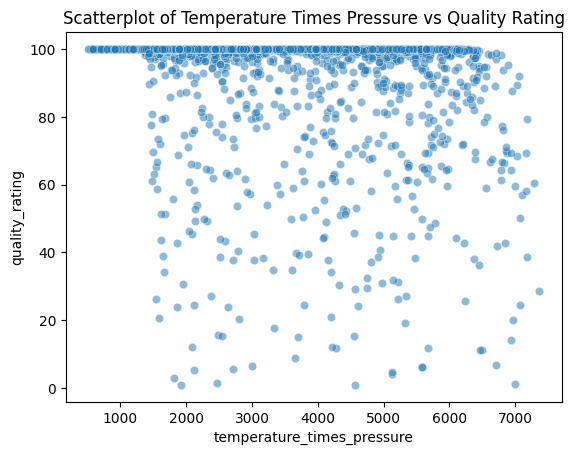

In [20]:
sns.scatterplot(
    x="temperature_times_pressure",
    y="quality_rating",
    data=df_manufacturing_eda,
    alpha=0.5,
)
plt.title("Scatterplot of Temperature Times Pressure vs Quality Rating")

Text(0.5, 1.0, 'Scatterplot of Material Fusion Metric vs Quality Rating')

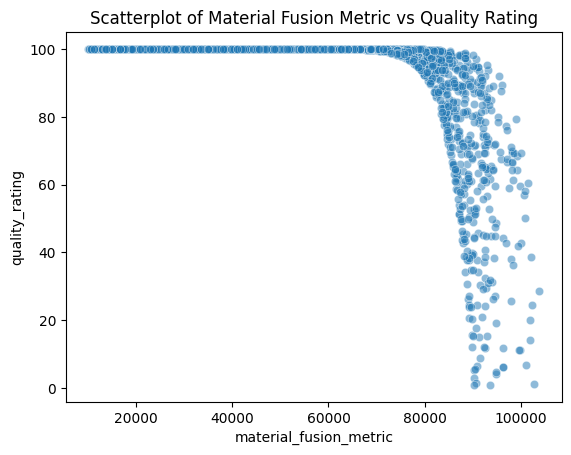

In [21]:
sns.scatterplot(
    x="material_fusion_metric",
    y="quality_rating",
    data=df_manufacturing_eda,
    alpha=0.5,
)
plt.title("Scatterplot of Material Fusion Metric vs Quality Rating")

Text(0.5, 1.0, 'Scatterplot of Material Transformation Metric vs Quality Rating')

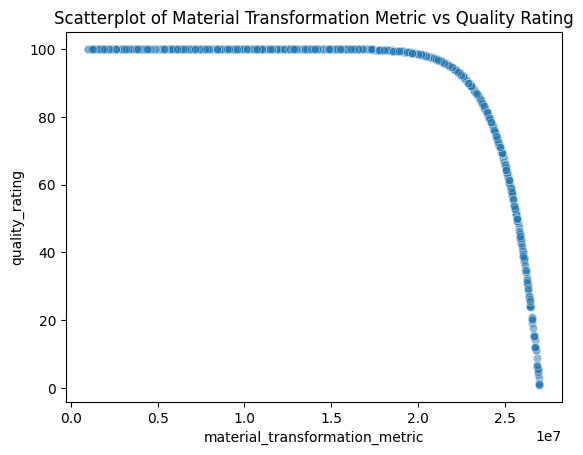

In [22]:
sns.scatterplot(
    x="material_transformation_metric",
    y="quality_rating",
    data=df_manufacturing_eda,
    alpha=0.5,
)
plt.title("Scatterplot of Material Transformation Metric vs Quality Rating")

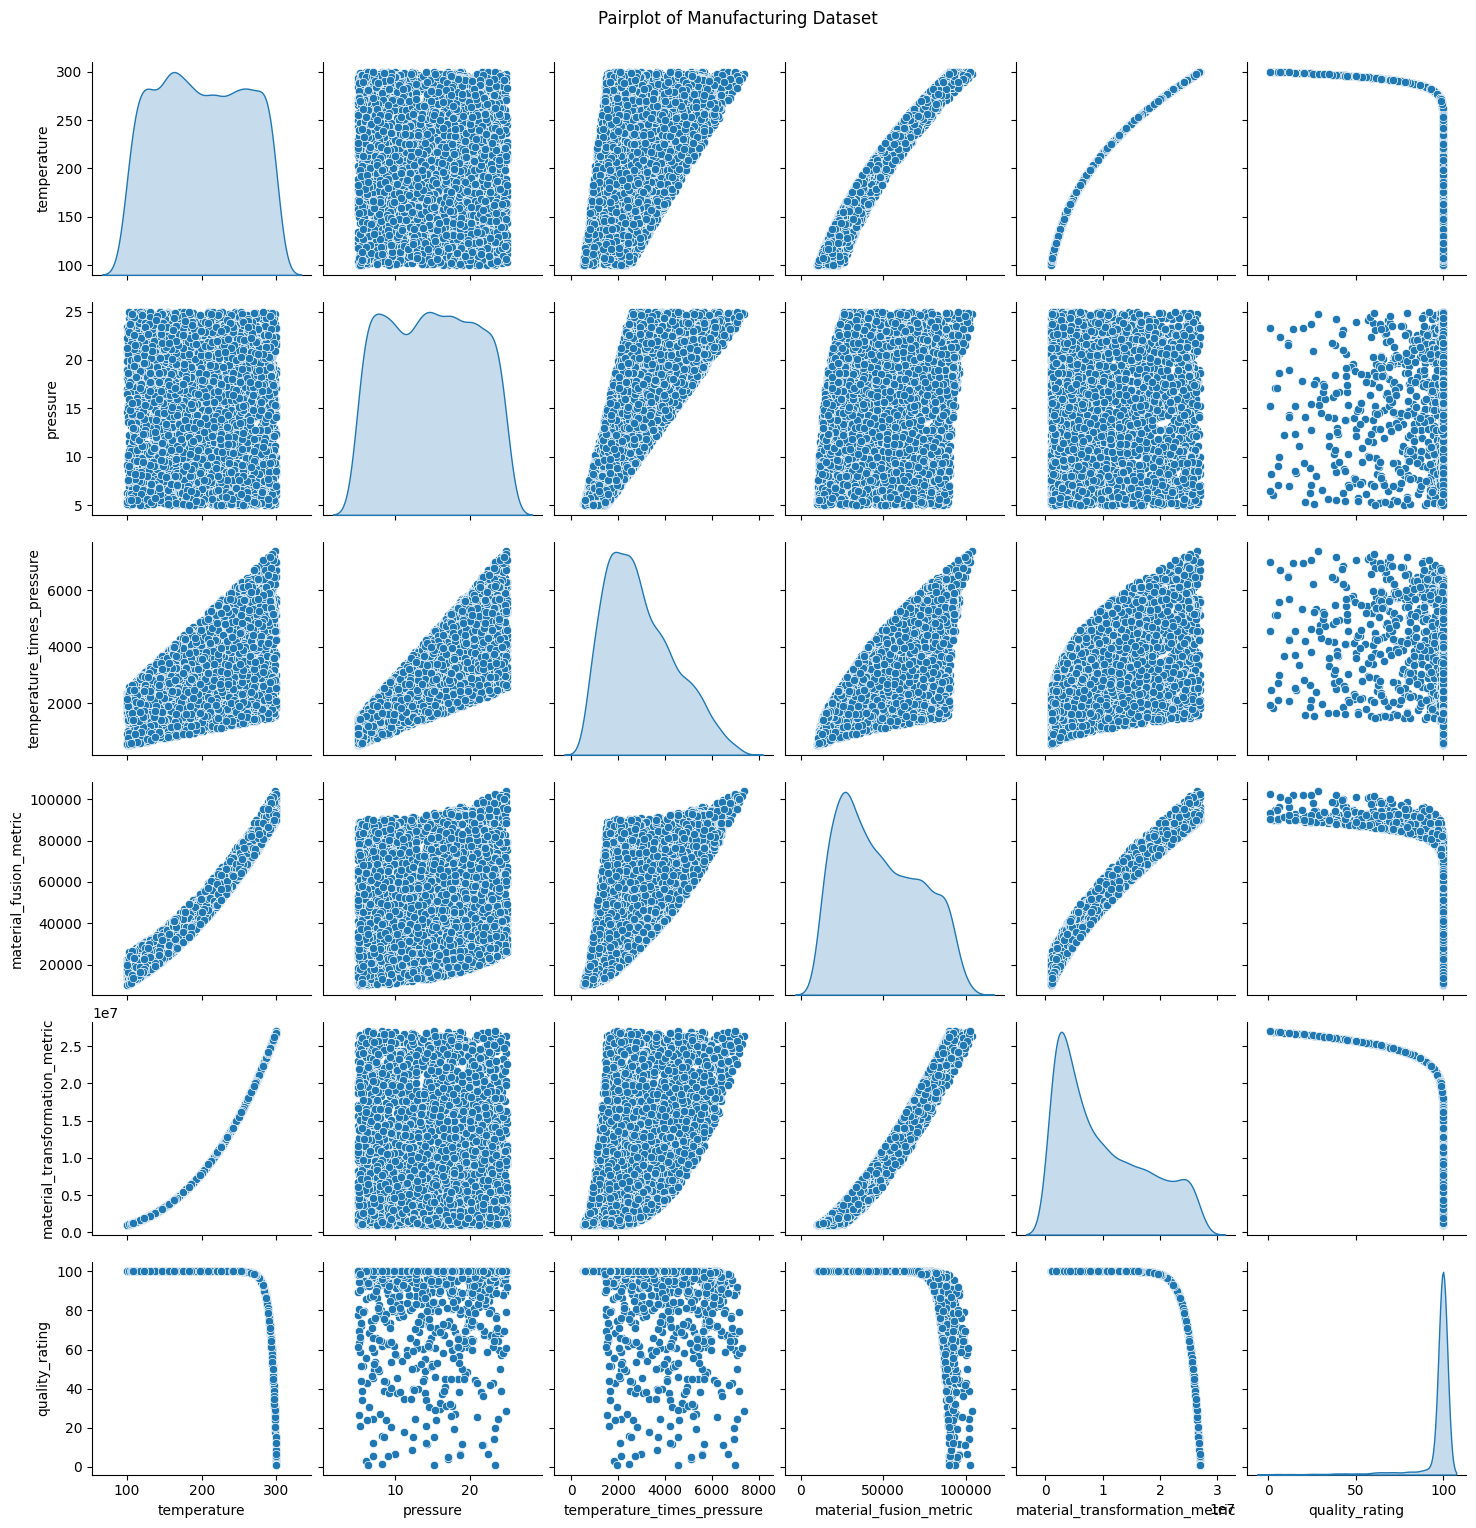

In [23]:
sns.pairplot(df_manufacturing_eda, diag_kind="kde")
plt.suptitle("Pairplot of Manufacturing Dataset", y=1.02)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Quality Rating')

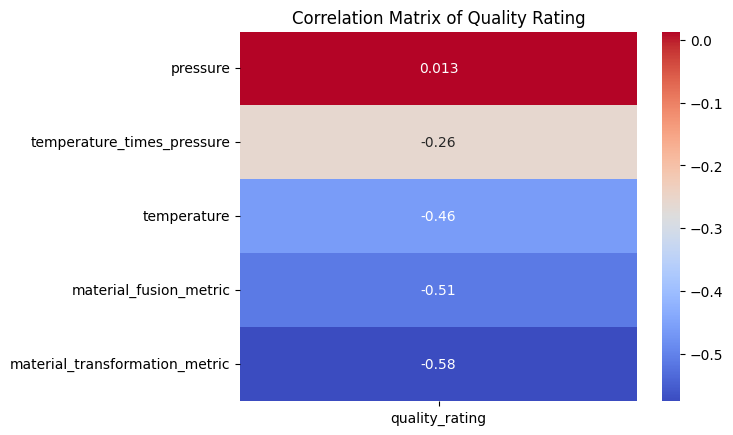

In [24]:
corr_matrix = df_manufacturing_eda.corr("pearson")
sns.heatmap(
    corr_matrix[["quality_rating"]]
    .sort_values(by="quality_rating", ascending=False)
    .drop("quality_rating"),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Matrix of Quality Rating (Pearson)")

Text(0.5, 1.0, 'Correlation Matrix of Quality Rating (Spearman)')

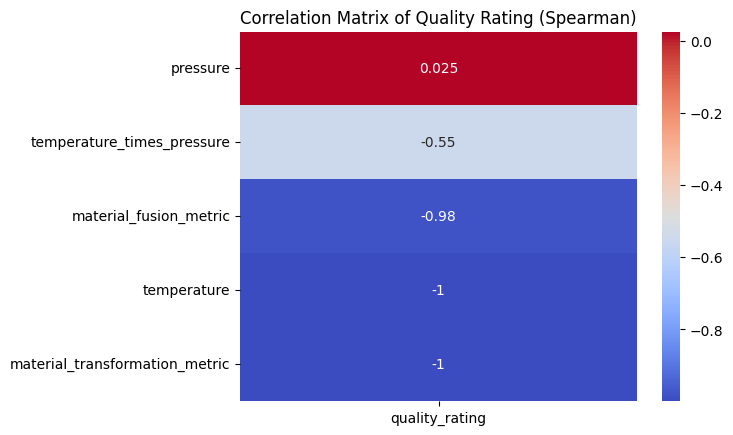

In [79]:
corr_matrix = df_manufacturing_eda.corr("spearman")
sns.heatmap(
    corr_matrix[["quality_rating"]]
    .sort_values(by="quality_rating", ascending=False)
    .drop("quality_rating"),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Matrix of Quality Rating (Spearman)")

## Training the model


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

In [26]:
X = df_manufacturing.drop("quality_rating", axis=1)
y = df_manufacturing["quality_rating"]

In [48]:
features = X.columns

In [49]:
def evaluate_model(X_train, X_test, y_train, y_test, degree):
    # Create a pipeline for the polynomial regression model
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), features),
            ("poly", PolynomialFeatures(degree=degree), features),
        ]
    )

    model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", LinearRegression()),
        ]
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the root mean squared error
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Calculate the r2 score
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate the percentage difference between the train and test RMSE
    rmse_percent_diff = np.abs(rmse_train - rmse_test) / rmse_train

    return rmse_train, rmse_test, r2_test, rmse_percent_diff

In [58]:
from joblib import Parallel, delayed

best_random_state = None
best_degree = None
best_r2_score = -np.inf
best_rmse_train = None
best_rmse_test = None
best_rmse_percent_diff = None


def evaluate_combination(random_state, degree):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state
    )

    rmse_train, rmse_test, r2_test, rmse_percent_diff = evaluate_model(
        X_train, X_test, y_train, y_test, degree
    )

    return random_state, degree, r2_test, rmse_train, rmse_test, rmse_percent_diff


results = Parallel(n_jobs=-1)(
    delayed(evaluate_combination)(random_state, degree)
    for random_state in range(100)
    for degree in range(1, 11)
)

for random_state, degree, r2_test, rmse_train, rmse_test, rmse_percent_diff in results:
    if r2_test > best_r2_score:
        best_random_state = random_state
        best_degree = degree
        best_r2_score = r2_test
        best_rmse_train = rmse_train
        best_rmse_test = rmse_test
        best_rmse_percent_diff = rmse_percent_diff

/Users/judd/.local/share/virtualenvs/ignite-ai-06-polynomial-regression-mRn8g6bi/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [68]:
print(f"Best Random State: {best_random_state}")
print(f"Best Degree: {best_degree}")
print(f"Best R2 Score: {best_r2_score:.8f}")
print(f"Best RMSE Train: {best_rmse_train:.8f}")
print(f"Best RMSE Test: {best_rmse_test:.8f}")
print(f"Best RMSE Percent Diff: {best_rmse_percent_diff:.2%}")

Best Random State: 17
Best Degree: 10
Best R2 Score: 0.99999821
Best RMSE Train: 0.01871457
Best RMSE Test: 0.01936569
Best RMSE Percent Diff: 3.48%


In [69]:
# Train the model with the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=best_random_state
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features),
        ("poly", PolynomialFeatures(degree=best_degree), features),
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['temperature', 'pressure', 'temperature_times_pressure',
       'material_fusion_metric', 'material_transformation_metric'],
      dtype='object')),
                                                 ('poly',
                                                  PolynomialFeatures(degree=10),
                                                  Index(['temperature', 'pressure', 'temperature_times_pressure',
       'material_fusion_metric', 'material_transformation_metric'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

## Residuals analysis


In [70]:
y_pred = model.predict(X_test)

In [71]:
residuals = y_test - y_pred

In [72]:
from scipy.stats import zscore

residuals_z = zscore(residuals)

Text(0.5, 1.0, 'Residuals vs Predicted Values')

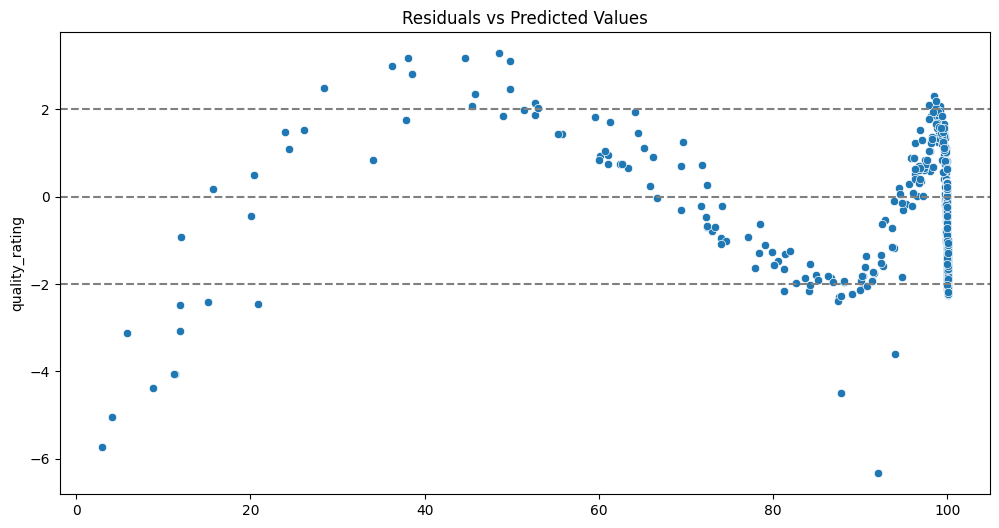

In [74]:
# Verify linearity and homoscedasticity of the residuals. To be considered linear, the residuals must
# be between -2 and 2 standard deviations of the mean. To be considered homoscedastic, the residuals
# must be evenly distributed around the mean (center line) and not form a pattern.
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals_z)
plt.axhline(y=0, color="gray", linestyle="--")
plt.axhline(y=2, color="gray", linestyle="--")
plt.axhline(y=-2, color="gray", linestyle="--")
plt.title("Residuals vs Predicted Values")

Text(0.5, 1.0, 'QQ Plot of Residuals')

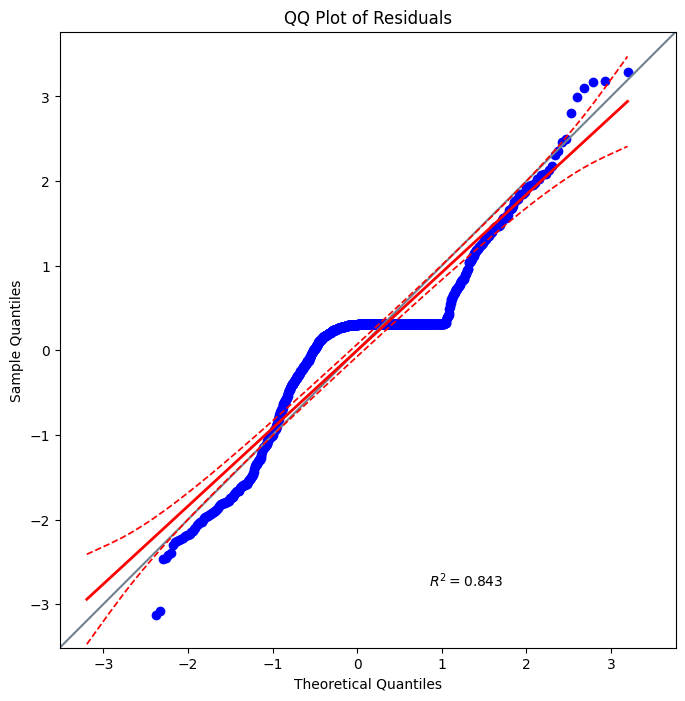

In [77]:
# Verify the normality of the residuals using a Q-Q plot
import pingouin as pg

plt.figure(figsize=(14, 8))
pg.qqplot(residuals, dist="norm", confidence=0.95)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Residuals")

In [80]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

# Shapiro-Wilk test
_, p_value_shapiro = shapiro(residuals_z)
alpha = 0.05

print(f"Shapiro-Wilk Test (H0: Residuals are Normally Distributed)")
print(f"p-value: {p_value_shapiro}")

if p_value_shapiro > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Shapiro-Wilk Test (H0: Residuals are Normally Distributed)
p-value: 5.18487418742525e-30
Reject the null hypothesis


In [81]:
_, p_value_ks = kstest(residuals, "norm")
alpha = 0.05

print(f"Kolmogorov-Smirnov Test (H0: Residuals are Normally Distributed)")
print(f"p-value: {p_value_ks}")

if p_value_ks > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Kolmogorov-Smirnov Test (H0: Residuals are Normally Distributed)
p-value: 1.6683295163820103e-205
Reject the null hypothesis


In [82]:
_, p_value_lilliefors = lilliefors(residuals)
alpha = 0.05

print(f"Lilliefors Test (H0: Residuals are Normally Distributed)")
print(f"p-value: {p_value_lilliefors}")

if p_value_lilliefors > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Lilliefors Test (H0: Residuals are Normally Distributed)
p-value: 0.0009999999999998899
Reject the null hypothesis


## Saving the model


In [84]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(model, f"models/manufacturing_model.pkl")

['models/manufacturing_model.pkl']